In [418]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [419]:
Data = pd.read_csv('USA_Housing.csv')
Data.head(10)

,Area Income,Area House Age,Area Number of Rooms,Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [420]:
del Data['Address']

In [421]:
#Now that we have imported the data we need to understand some things
#*1 what is our dataset saying to us 
#*2 what are the  problems of our data
#*3 what are the things not needed in my dataset
#*4 which algorithm should i use is it supervised or unsupervised
#*5 if supervised which algorithm is the best to solve my problem

Visualize you Dataset

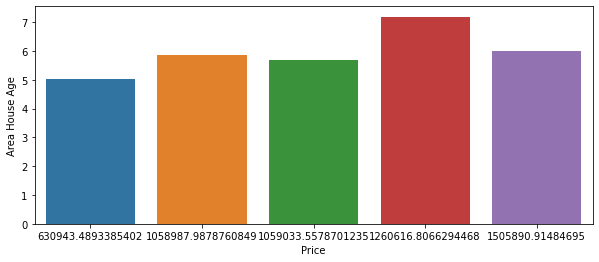

In [422]:
fig = plt.figure(figsize = (10,4))
sns.barplot(x = 'Price', y = 'Area House Age', data = Data.head())

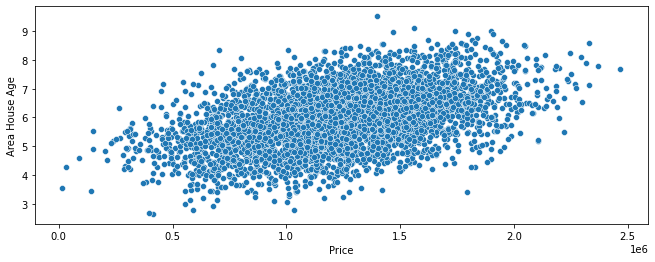

In [423]:
fig = plt.figure(figsize = (11,4))
sns.scatterplot(x = 'Price', y = 'Area House Age', data = Data)

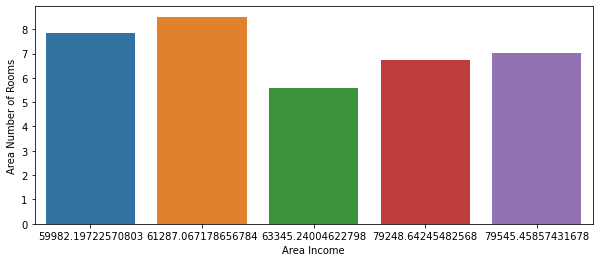

In [424]:
fig = plt.figure(figsize = (10,4))
sns.barplot(x = 'Area Income', y = 'Area Number of Rooms', data = Data.head())

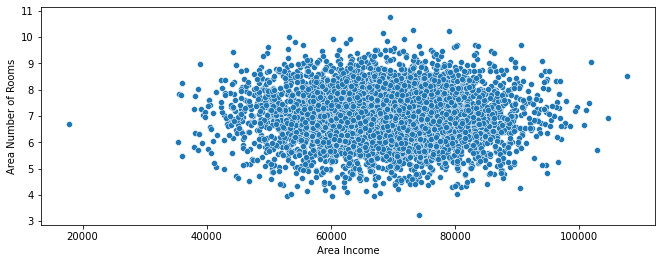

In [425]:
fig = plt.figure(figsize = (11,4))
sns.scatterplot(x = 'Area Income', y = 'Area Number of Rooms', data = Data)

In [426]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area Income              5000 non-null   float64
 1   Area House Age           5000 non-null   float64
 2   Area Number of Rooms     5000 non-null   float64
 3   Area Number of Bedrooms  5000 non-null   float64
 4   Area Population          5000 non-null   float64
 5   Price                    5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [427]:
Data.describe()

,Area Income,Area House Age,Area Number of Rooms,Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [428]:
Data.count()

Area Income                5000
Area House Age             5000
Area Number of Rooms       5000
Area Number of Bedrooms    5000
Area Population            5000
Price                      5000
dtype: int64

In [429]:
Data.shape

(5000, 6)

In [430]:
Data.isnull().values.any()

False

In [431]:
def plot_corr(Data, size=11):

  corr = Data.corr()
  fig, ax = plt.subplots(figsize=(size,size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)),corr.columns)

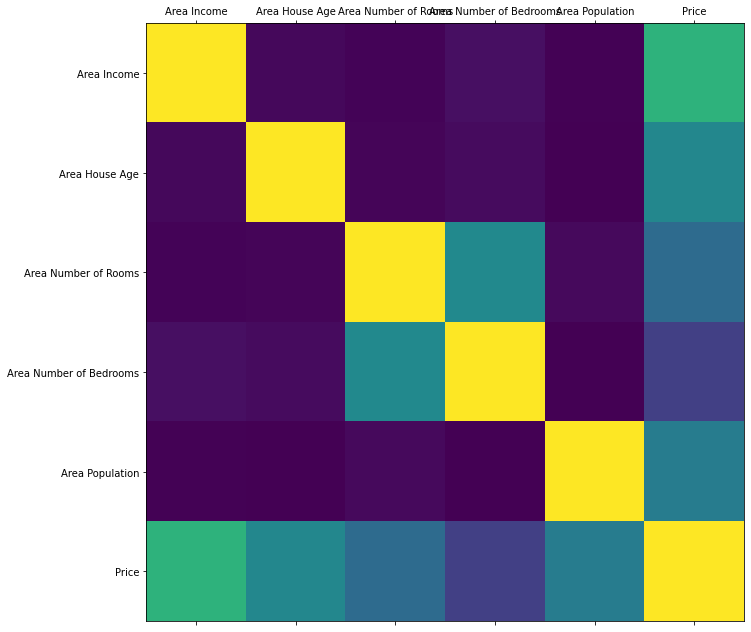

In [432]:
plot_corr(Data)

In [433]:
Data.head()

,Area Income,Area House Age,Area Number of Rooms,Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [434]:
from sklearn.model_selection import train_test_split
feature_col_names = Data.columns
predicted_class_names = ['Price']

X =  Data[feature_col_names] 
X = X.astype('int')# predictor feature columns (8 X m)
y = Data[predicted_class_names] # predicted class (1=true, 0=false) column (1 X m)
y = y.astype('int')
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=split_test_size,shuffle= True, 
                                                      random_state=0) 

In [435]:
print("{0:0.2f}% in training set".format((len(X_train)/len(Data.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(Data.index)) * 100))

70.00% in training set
30.00% in test set


In [436]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [437]:
from sklearn.svm import SVR
rf_model = SVR(kernel="rbf", C=1000, gamma=0.1, epsilon=0.1)
rf_model.fit(X_train, y_train.values.flatten())

SVR(C=1000, gamma=0.1)

### Predict Training Data

In [438]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.r2_score(y_train, rf_predict_train)))

Accuracy: 0.7608


### Predict Test Data

In [439]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.r2_score(y_test, rf_predict_test)))

Accuracy: 0.7570


In [440]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators =5, max_depth=2)      # Create random forest object
rf_model.fit(X_train, y_train.values.flatten()) 

RandomForestRegressor(max_depth=2, n_estimators=5)

In [441]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.r2_score(y_train, rf_predict_train)))

Accuracy: 0.8944


In [442]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.r2_score(y_test, rf_predict_test)))

Accuracy: 0.8952
